<div align="center">
 <h1> Marketing Bancário &nbsp; 💰💲</h1>
 </div>


  

###  Variáveis que vamos trabalhar



- <p><strong>Age</strong>: Idade do cliente.</p>

- <p><strong>Job</strong>: Tipo de trabalho do cliente.</p>

- <p><strong>Marital</strong>: Estado civil do cliente.</p>

- <p><strong>Education</strong>: Nível de educação do cliente.</p>

- <p><strong>Default</strong>: Indicador se o cliente tem crédito em inadimplente.</p>

- <p><strong>Balance</strong>: Saldo médio anual do cliente em euros.</p>

- <p><strong>Housing</strong>: Indicador se o cliente tem empréstimo habitação.</p>

- <p><strong>Loan</strong>: Indicador se o cliente tem empréstimo pessoal.</p>

- <p><strong>Day</strong>: Último dia de contato do mês.</p>

- <p><strong>Month</strong>: Último mês de contato do ano.</p>

- <p><strong>Duration</strong>: Duração do último contato, em segundos.</p>

- <p><strong>Campaign</strong>: Número de contatos realizados durante esta campanha e para este cliente, incluindo o último contato.</p>

- <p><strong>Pdays</strong>: Dias que o cliente foi contatado pela última vez em uma campanha anterior -1 não foi contatado anteriormente.</p>

- <p><strong>Previous</strong>: Número de contatos realizados antes desta campanha e para este cliente.</p>

- <p><strong>Poutcome</strong>: Resultado da campanha de marketing anterior.</p>

### Variável Alvo
- <strong>Depositou(y)</strong>: O cliente subscreveu a um depósito a prazo?

### Explicando a variável depositou:
- O que é um depósito a prazo?
 Um depósito a prazo é uma forma de investimento em que o investidor deposita uma quantia fixa de dinheiro em uma instituição financeira por um período de tempo específico, conhecido como prazo . Durante esse período, o dinheiro fica bloqueado e não pode ser retirado até o vencimento do prazo. Em troca, o investidor recebe uma taxa de juros fixa ou variável sobre o valor depositado .

- Prazo: Os depósitos a prazo geralmente têm prazos fixos que variam de alguns meses a vários anos .
Taxa de juros: Eles oferecem taxas de juros mais atrativas do que as contas de poupança tradicionais, proporcionando uma oportunidade de ganho adicional .
- Acesso limitado: Durante o prazo do depósito, o acesso ao dinheiro é limitado. Geralmente, não é possível fazer retiradas ou saques antecipados sem penalidades .
- Segurança: São considerados investimentos de baixo risco, pois são protegidos por garantias do governo ou seguros de depósito oferecidos por instituições financeiras .
### Rescisão antecipada:
Em alguns casos, os investidores podem solicitar a rescisão antecipada de um depósito a prazo. No entanto, isso geralmente resulta em penalidades, como a redução da taxa de juros ou a perda de parte dos juros ganhos até o momento. Além disso, a instituição financeira pode exigir aviso prévio para processar a rescisão antecipada .




### Fonte do Dataframe
https://www.kaggle.com/datasets/adilashrafi/bank-marketing-classification-task 

  <div align="center">
 <h1> Bibliotecas Utilizadas 📖</h1>
 </div>

In [631]:
# Tratamento de Dados
import pandas as pd
import numpy as np

# Para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

# Modelagem
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

term_deposits = df.copy()

# Desativar todos os avisos
import warnings
warnings.filterwarnings("ignore")


- Importando o DataFrame

In [632]:
# Ler o arquivo e colunas  que serão usadas
df = pd.read_csv("bank_data.csv", usecols=["age", "job", "marital", "education", "default", "balance", "housing", "loan", "contact", "day", "month",
                                           "duration", "campaign", "pdays", "previous", "poutcome", "y"])

# Visualizando cinco amostras aleatórias do Dataframe
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
980,43,management,divorced,tertiary,no,388,yes,no,unknown,8,may,2087,2,-1,0,unknown,yes
3154,34,management,divorced,secondary,no,291,no,no,cellular,7,aug,91,2,-1,0,unknown,no
2417,62,management,married,tertiary,no,0,no,no,cellular,13,oct,78,3,-1,0,unknown,no
3028,34,admin.,married,secondary,no,79,yes,no,unknown,23,may,83,1,-1,0,unknown,no
3093,53,entrepreneur,married,tertiary,no,71,no,yes,cellular,29,jan,86,1,-1,0,unknown,no


<div align="center">
 <h1> Manipulação e Visualização dos Dados 🔎&nbsp; </h1>
 </div>

- Para tornar a compreensão mais fácil, vamos renomear a variável alvo, já que desempenha um papel crucial em nosso modelo !


In [633]:
#Renomeando uma coluna do Dataframe
df.rename(columns={'y': "depositou"}, inplace=True)

#Checagem de números vázios. 
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
depositou    0
dtype: int64

In [634]:
#Verificando os tipos de dados das colunas, o tamanho do arquivo e a quantidade de linhas e colunas do Dataframe
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  depositou  4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


- Com este describe, aparentemente temos algumas anomalias. O número mais alto em relação aos outros é o saldo (balance), com 71 mil euros. Mais tarde, vamos verificar outras anomalias.

- Falando ainda sobre o saldo, vemos que 25% dos clientes têm menos de £69,00.

- Logo, percebemos que 75% dos clientes têm abaixo de 49 anos, e a mediana é de 39 anos, muito próxima da mediana de 41 anos, mostrando que não lidamos com um publico tão alto de idosos ...

In [635]:
#Descrição estatística, arredondada para melhor visualização 
df.describe().round(2)

,age,balance,day,duration,campaign,pdays,previous
count,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00
mean,41.17,1422.66,15.92,263.96,2.79,39.77,0.54
std,10.58,3009.64,8.25,259.86,3.11,100.12,1.69
min,19.00,-3313.00,1.00,4.00,1.00,-1.00,0.00
25%,33.00,69.00,9.00,104.00,1.00,-1.00,0.00
50%,39.00,444.00,16.00,185.00,2.00,-1.00,0.00
75%,49.00,1480.00,21.00,329.00,3.00,-1.00,0.00
max,87.00,71188.00,31.00,3025.00,50.00,871.00,25.00


- Temos somente dois com saldo maior que 30.000, isso explica o desvio padrão não estar mais alto ainda !

In [636]:
#Números de clientes com saldo acima de £30.000 
(df["balance"]>30000).sum() 

2

- 366 clientes com conta negativada . 

In [637]:
# Avaliando números de pessoas com saldo negativo 
(df["balance"]<0).sum()

366

- Temos bastante variáveis categoricas.

In [638]:
#Valores distintos por coluna
df.nunique().sort_values()    

depositou       2
loan            2
housing         2
default         2
contact         3
marital         3
poutcome        4
education       4
job            12
month          12
previous       24
day            31
campaign       32
age            67
pdays         292
duration      875
balance      2353
dtype: int64

- Plotando um histograma de todas as variáveis. Com esse histograma, consigo observar como  as variáveis númericas estão distribuídas e sua frequência.

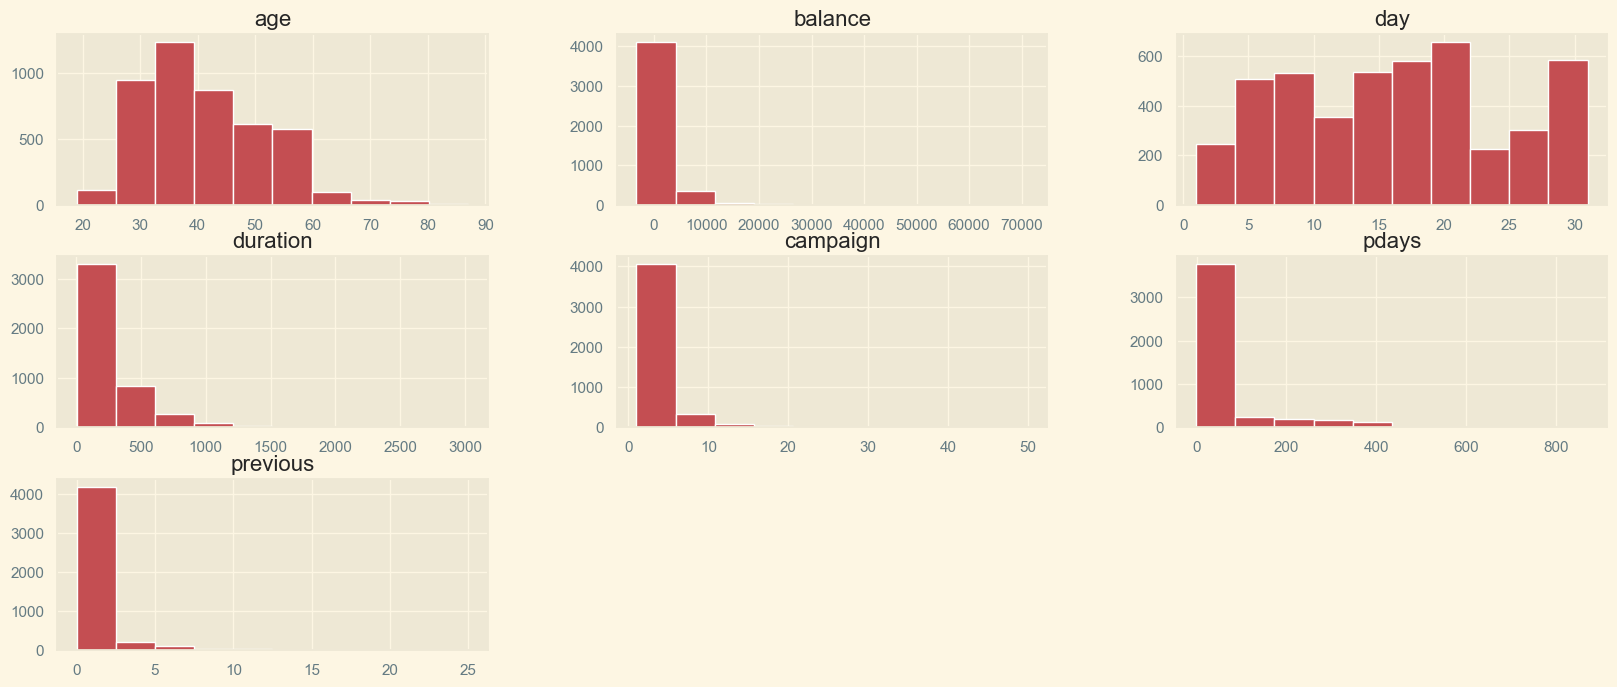

In [639]:
# Plotando o histograma
df.hist(figsize=(20,8), color="r")
plt.show()

In [640]:
#Visualizando 5 primeiras linhas
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,depositou
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


#### A campanha surtiu efeito em 11,5% dos clientes .

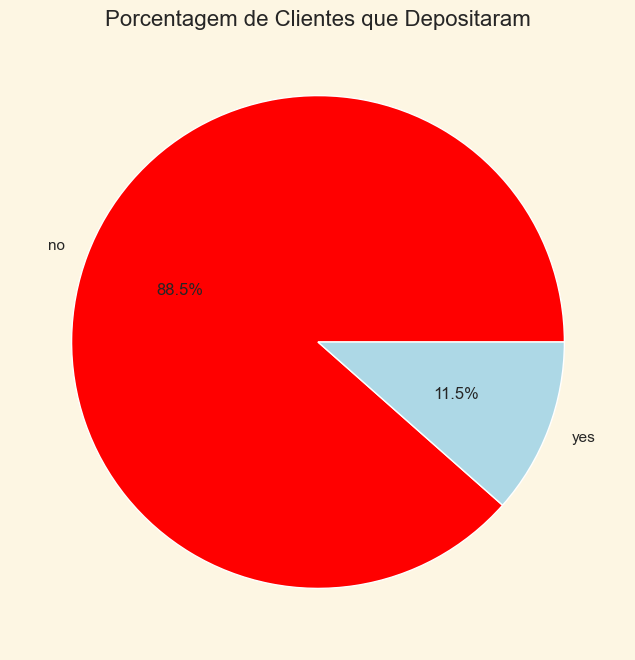

In [641]:
# Calculando a contagem de "depositou_encoded"
depositou_counts = df["depositou"].value_counts()

# Cores para cada fatia
cores = ["red", "lightblue"]

# Criando o gráfico de pizza para "depositou"
plt.figure(figsize=(18,8))
plt.pie(x=depositou_counts, labels=depositou_counts.index, colors=cores, autopct="%1.1f%%")
plt.title("Porcentagem de Clientes que Depositaram")
plt.show()

In [642]:
#Distinção da coluna trabalho
df["job"].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

# Agora iremos observar algumas variáveis categoricas em relação a nossa variável alvo .

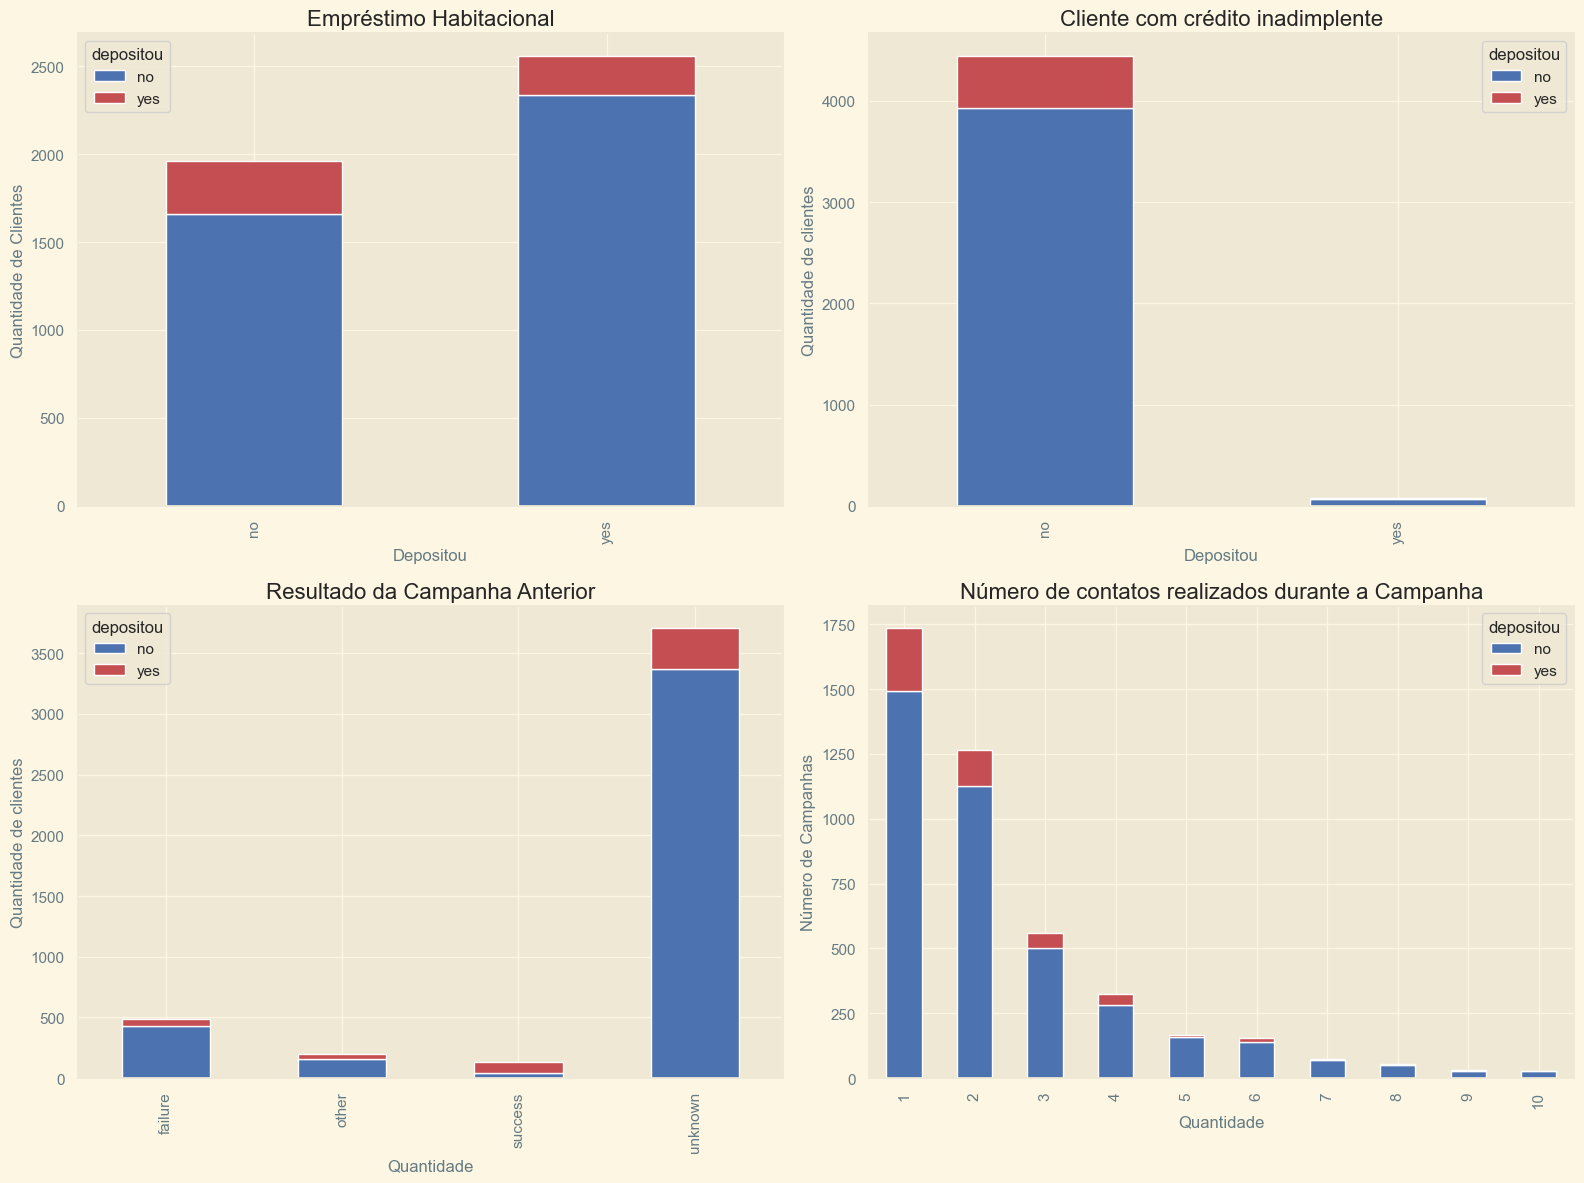

In [643]:
plt.style.use("Solarize_Light2")
# Criando os subplots
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Comparação entre "housing" e "depositou"
df.groupby(["housing", "depositou"]).size().unstack().plot(kind="bar", stacked=True, ax=ax[0, 0], color=["b", "r"])
ax[0, 0].set_title("Empréstimo Habitacional")
ax[0, 0].set_xlabel("Depositou")
ax[0, 0].set_ylabel("Quantidade de Clientes")

# Gráfico 2: Comparação entre "default" e "depositou"
df.groupby(["default", "depositou"]).size().unstack().plot(kind="bar", stacked=True, ax=ax[0, 1], color=["b", "r"])
ax[0, 1].set_title("Cliente com crédito inadimplente")
ax[0, 1].set_xlabel("Depositou")
ax[0, 1].set_ylabel("Quantidade de clientes")

# Gráfico 3: Comparação entre "poutcome" e "depositou"
df.groupby(["poutcome", "depositou"]).size().unstack().plot(kind="bar", stacked=True, ax=ax[1, 0], color=["b", "r"])
ax[1, 0].set_title("Resultado da Campanha Anterior")
ax[1, 0].set_xlabel("Quantidade")
ax[1, 0].set_ylabel("Quantidade de clientes")

# Filtrando dados para campanhas menores que 10
df_tcampa = df[df["campaign"] < 11]

# Gráfico 4: Comparação entre "campaign" e "depositou"
df_tcampa.groupby(["campaign", "depositou"]).size().unstack().plot(kind="bar", stacked=True, ax=ax[1, 1], color=["b", "r"])
ax[1, 1].set_title("Número de contatos realizados durante a Campanha")
ax[1, 1].set_xlabel("Quantidade")
ax[1, 1].set_ylabel("Número de Campanhas")

# Ajustando o layout
plt.tight_layout()
# Exibindo os gráficos
plt.show()


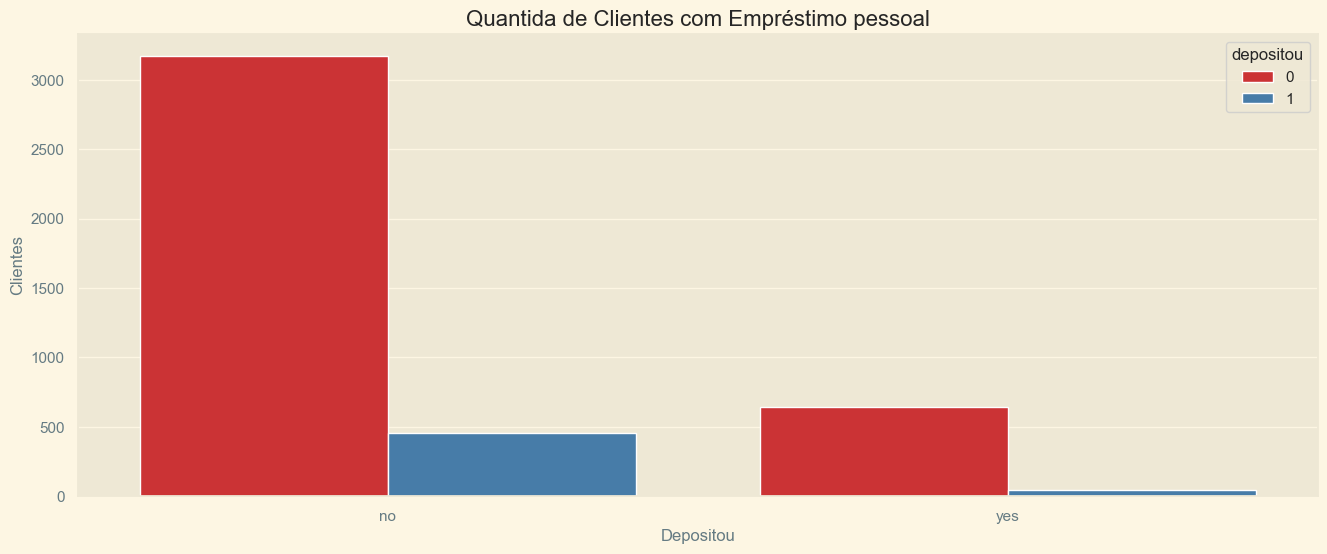

In [667]:

fig, ax = plt.subplots(figsize=(16, 6))

sns.barplot(x="loan", y="count", hue="depositou", data=df.groupby(["loan", "depositou"]).size().reset_index(name="count"), ax=ax, palette="Set1")

ax.set_xlabel("Depositou")
ax.set_ylabel("Clientes")
ax.set_title("Quantida de Clientes com Empréstimo pessoal")
plt.show()


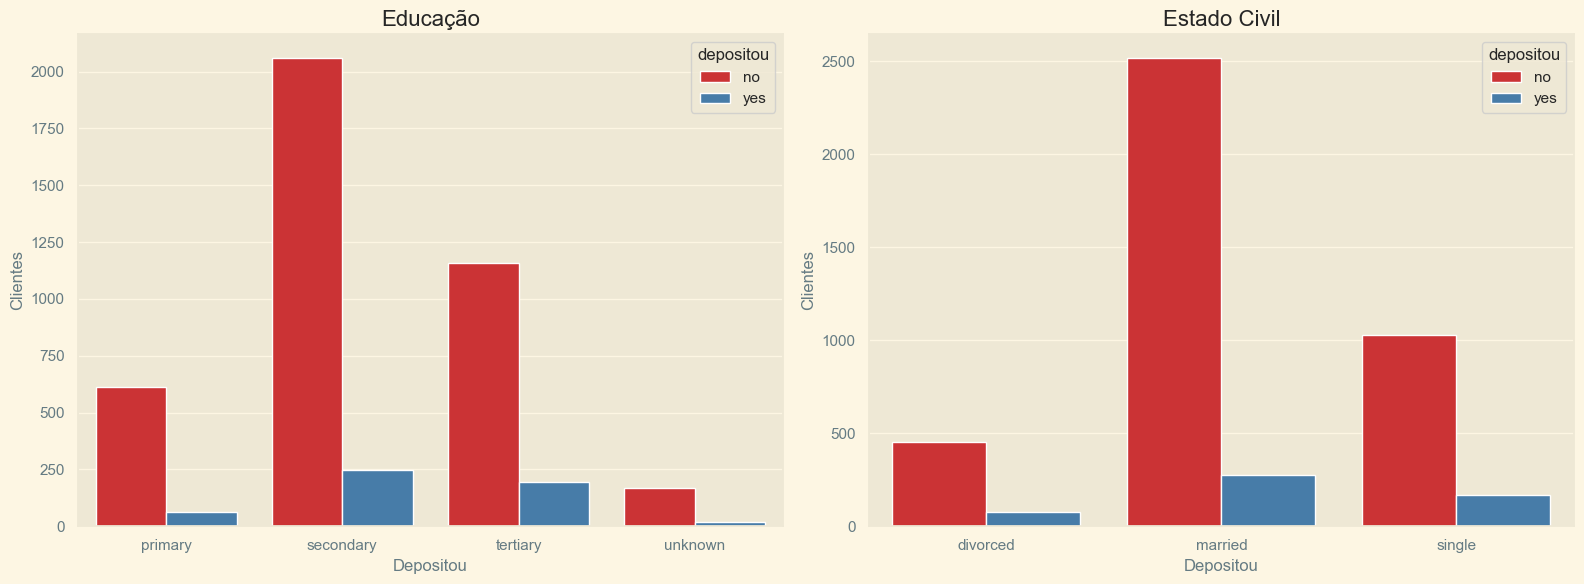

In [645]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x="education", y="count", hue="depositou", data=df.groupby(["education", "depositou"]).size().reset_index(name="count"), ax=ax[0], palette="Set1")

ax[0].set_xlabel("Depositou")
ax[0].set_ylabel("Clientes")
ax[0].set_title("Educação")
sns.barplot(x="marital", y="count", hue="depositou", data=df.groupby(["marital", "depositou"]).size().reset_index(name="count"), ax=ax[1], palette="Set1")

ax[1].set_xlabel("Depositou")
ax[1].set_ylabel("Clientes")
ax[1].set_title("Estado Civil")
plt.tight_layout()
plt.show()


In [646]:
#Tirando educação desconhecida
df = df.drop(df.loc[df["education"] == "unknown"].index)
df["education"].unique()

array(['primary', 'secondary', 'tertiary'], dtype=object)

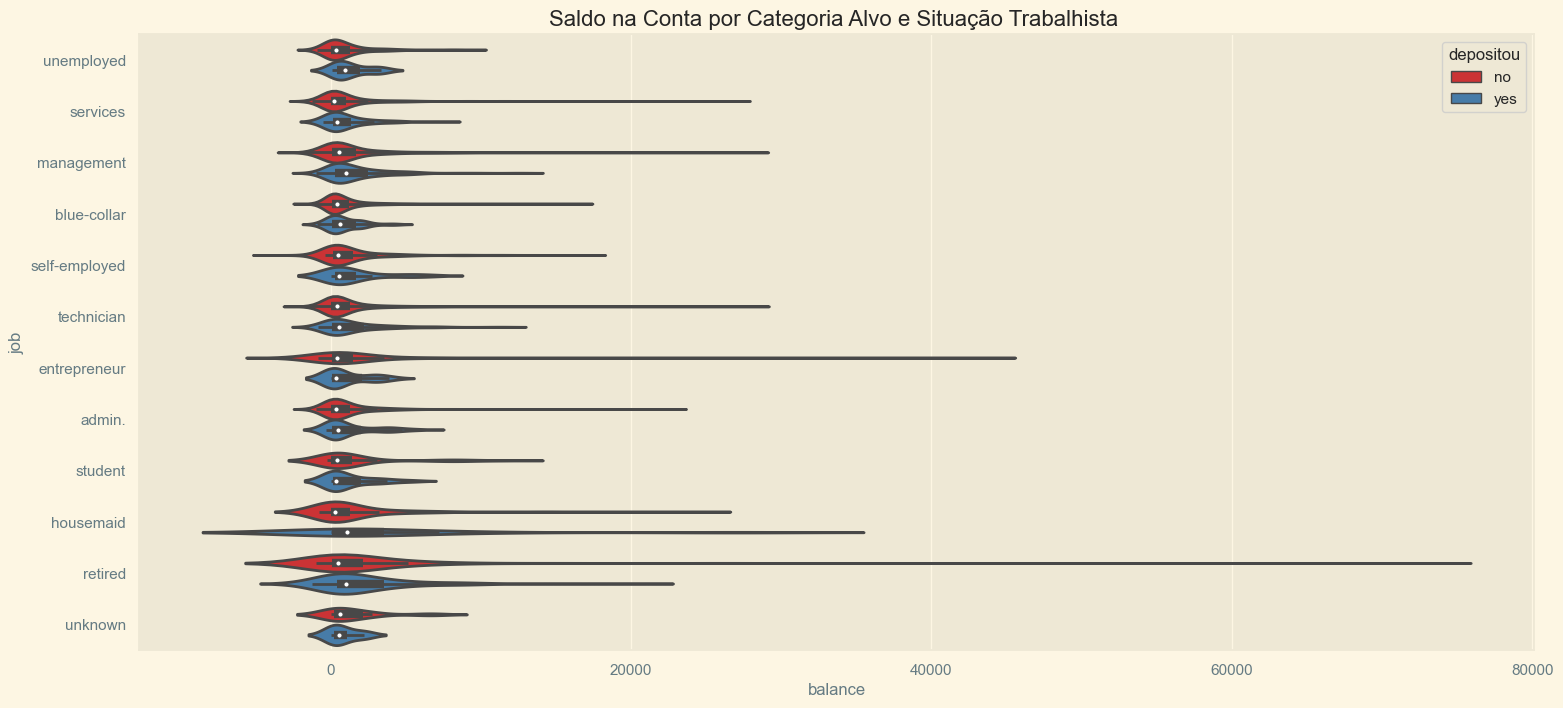

In [647]:
fig = plt.figure(figsize=(18,8))

sns.violinplot(x="balance", y="job", hue="depositou", palette="Set1",
            data=df);

plt.title("Saldo na Conta por Categoria Alvo e Situação Trabalhista ", fontsize=16)

plt.show()

In [648]:
#Tirando a coluna de desconhecidos
df = df.drop(df.loc[df["job"] == "unknown"].index)

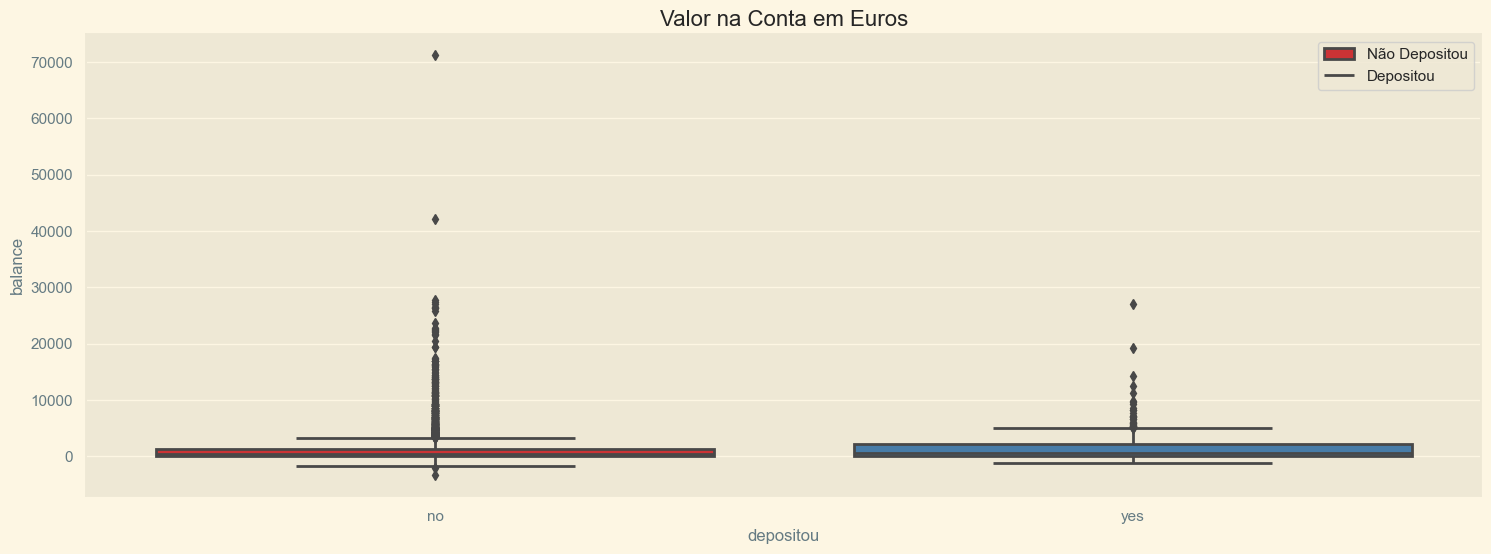

In [649]:
fig = plt.figure(figsize=(18,6))
sns.boxplot(x="depositou", y="balance", data=df, palette="Set1")

# Adicionar título
plt.title("Valor na Conta em Euros")

# Adicionar legenda
plt.legend(labels=["Não Depositou", "Depositou"])

# Mostrar gráfico
plt.show()

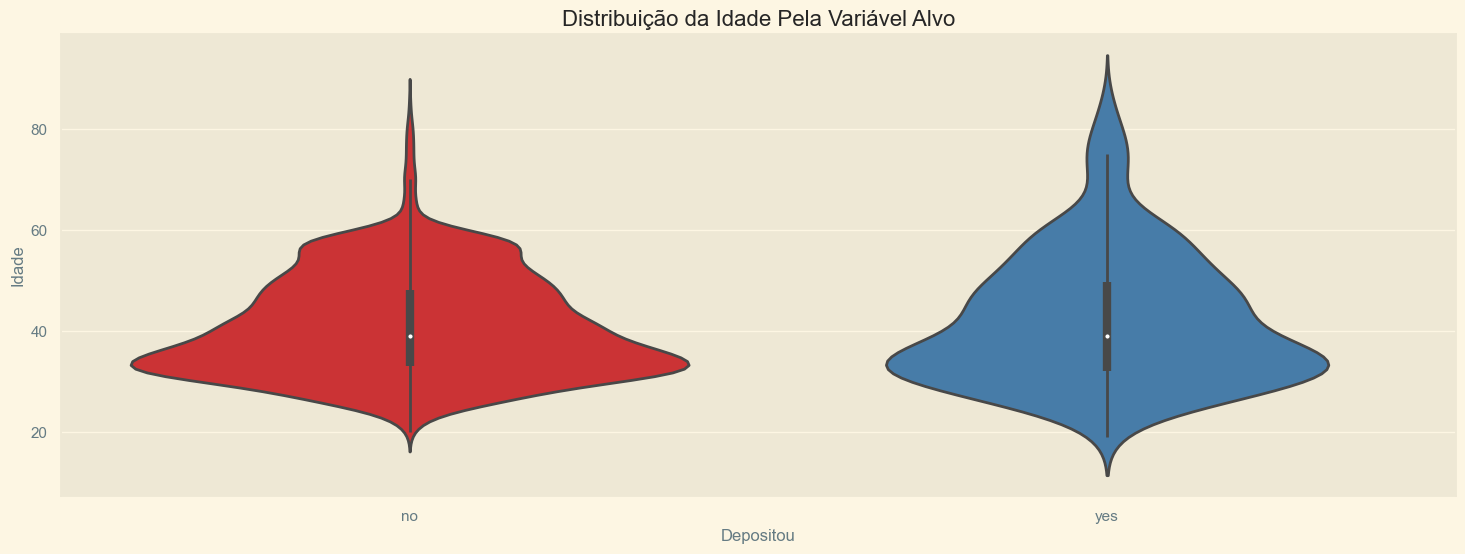

In [650]:
#Verificando a distribuição das idades, um grafico muito bom para isso é o violino...Olha como ele mostra muito bem cada ponto !
plt.figure(figsize=(18, 6))
sns.violinplot(x="depositou", y="age",palette="Set1", data=df)
plt.title("Distribuição da Idade Pela Variável Alvo")
plt.xlabel("Depositou")
plt.ylabel("Idade")
plt.show()

In [651]:
#Últimas 5 linhas
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,depositou
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


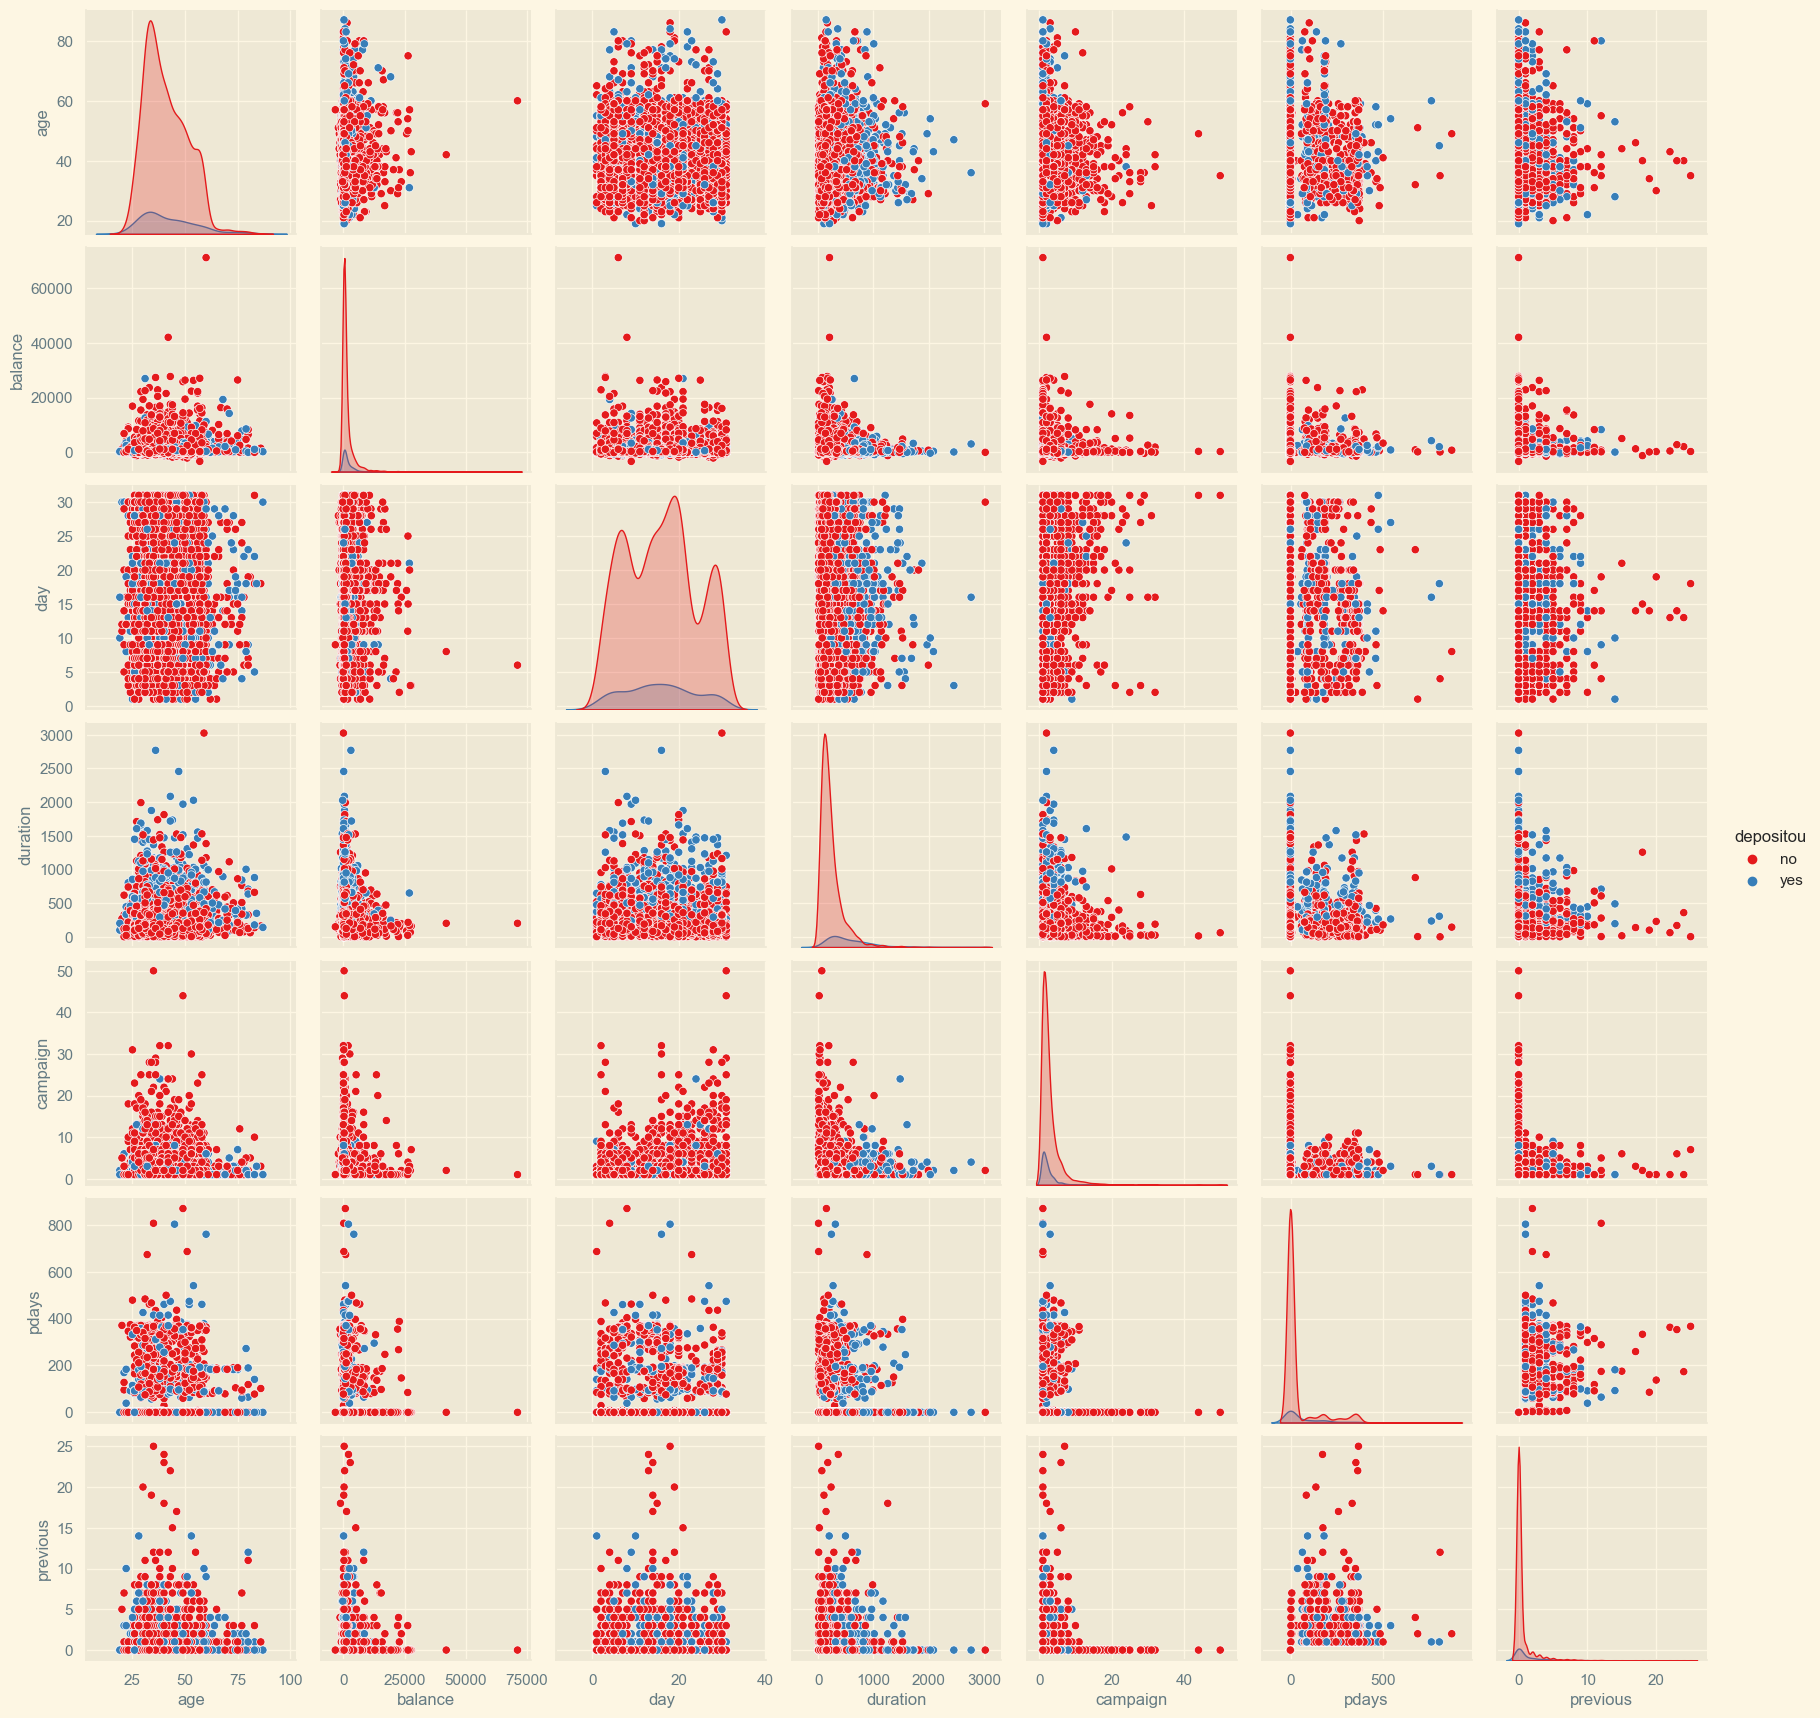

In [652]:
sns.pairplot(df, hue='depositou', palette="Set1" )
plt.show()       


<div align="center">
 <h1> Depositou 0 = Não 1= Sim </h1>
 </div>

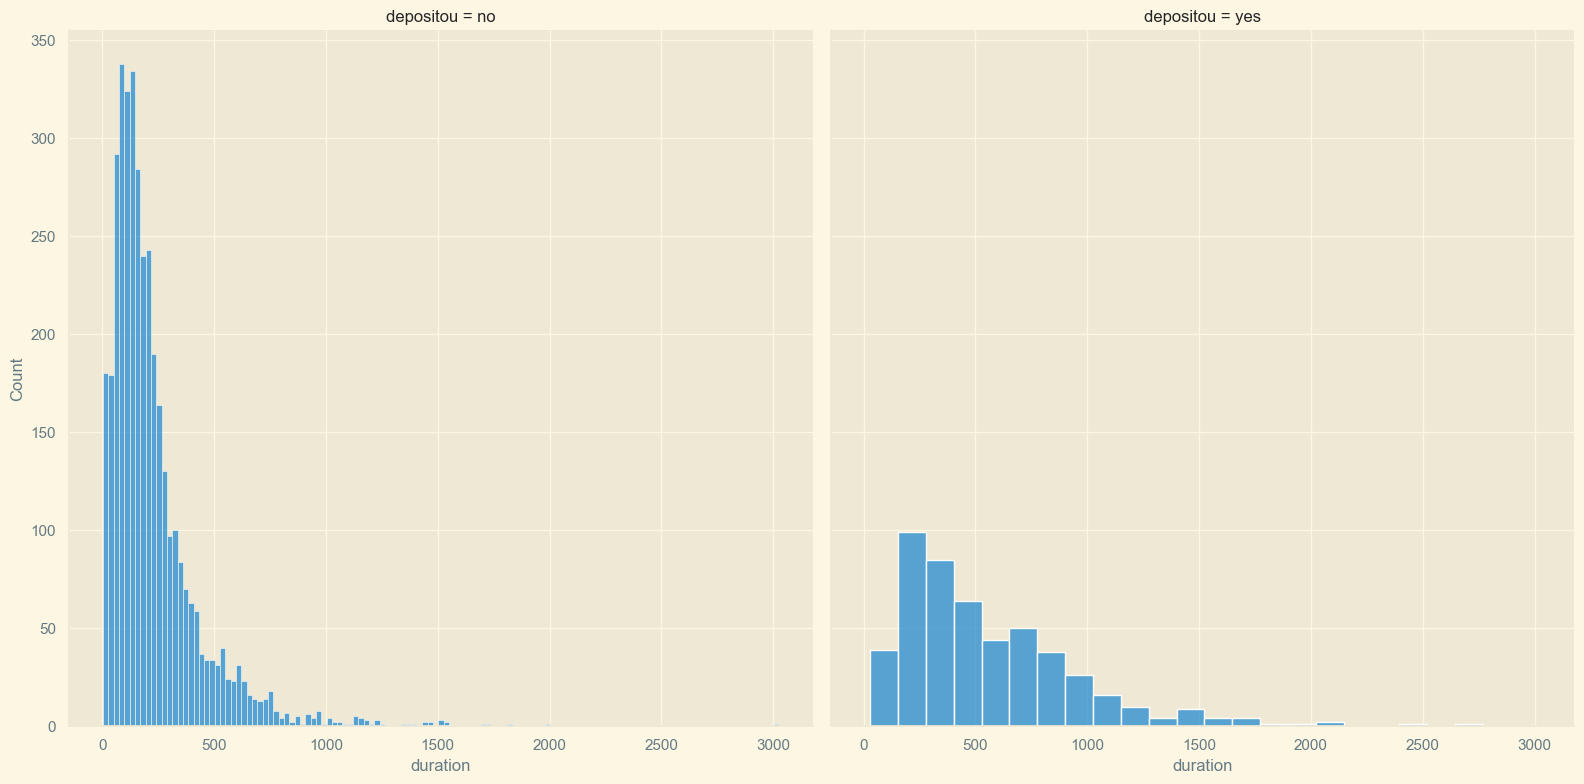

In [653]:
# Criar um FacetGrid
his = sns.FacetGrid(df, col="depositou", height=8)

# Mapear o histograma para a coluna "age"
his.map(sns.histplot, "duration")

# Mostrar o FacetGrid
plt.show()

In [654]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,depositou
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [655]:
df.drop(['marital', 'education', 'contact'], axis=1, inplace=True)


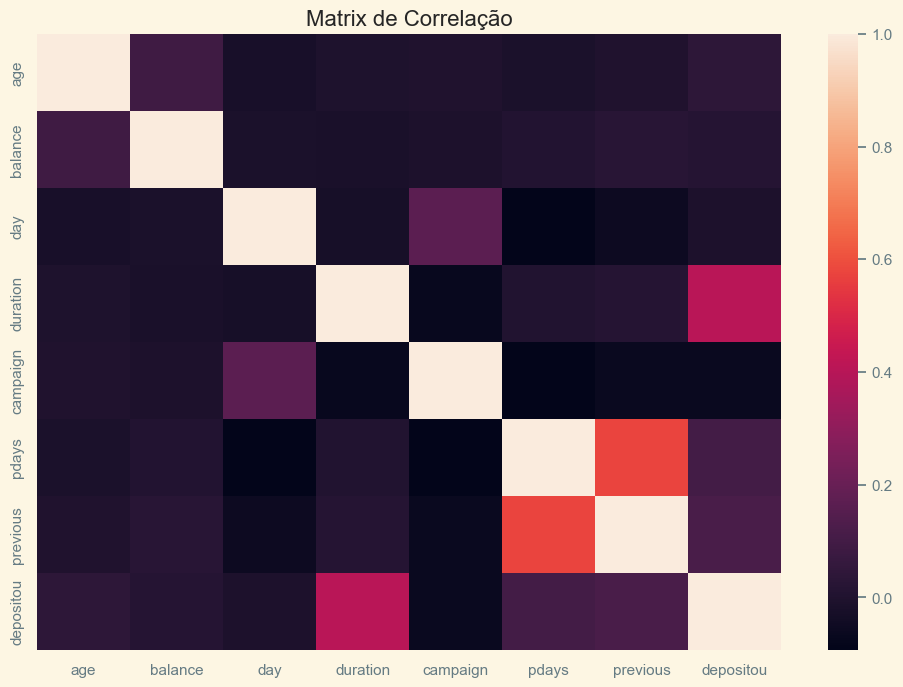

In [656]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(12,8))

#Transformando o depositou
df["depositou"] = LabelEncoder().fit_transform(df["depositou"])

#Separando data frame númerico
df_numerico = df.select_dtypes(exclude="object")

corr_numeric = df_numerico.corr()

sns.heatmap(corr_numeric, cbar=True )
plt.title("Matrix de Correlação", fontsize=16)
plt.show()

In [657]:
df_numerico.head()

,age,balance,day,duration,campaign,pdays,previous,depositou
0,30,1787,19,79,1,-1,0,0
1,33,4789,11,220,1,339,4,0
2,35,1350,16,185,1,330,1,0
3,30,1476,3,199,4,-1,0,0
4,59,0,5,226,1,-1,0,0


In [658]:
clf = DecisionTreeClassifier()

In [659]:
X_train, X_test, y_train, y_test = train_test_split(df_numerico.drop("depositou",axis=1),df_numerico["depositou"],test_size=0.3)

In [660]:
X_train.shape,X_test.shape

((3017, 7), (1294, 7))

In [661]:
y_train.shape,y_test.shape

((3017,), (1294,))

In [662]:
clf=clf.fit(X_train,y_train)
clf.feature_importances_
for feature, importancia in zip (df_numerico.columns, clf.feature_importances_):
    print(" {}:{}".format(feature, importancia))

 age:0.1251328609513775
 balance:0.1751923231308641
 day:0.13017182341534964
 duration:0.36352605261760573
 campaign:0.0385775923395488
 pdays:0.14536519626642946
 previous:0.022034151278824906


<div align="center">
 <h1> Avaliação do Modelo </h1>
 </div>

In [663]:
#Média da precisão
resultado= clf.predict(X_test)
clf.score(X_test, y_test)

0.8508500772797527

In [664]:
#Precisão do modelo
print(metrics.classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1148
           1       0.36      0.42      0.39       146

    accuracy                           0.85      1294
   macro avg       0.64      0.66      0.65      1294
weighted avg       0.86      0.85      0.86      1294



In [665]:
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source
from sklearn.tree import export_graphviz

In [666]:
X, y = df_numerico.drop("depositou", axis=1), df_numerico["depositou"]
features_label = df_numerico.drop("depositou", axis=1).columns
class_label = ["0", "1"]

def plot_tree(crit, split, depth, min_samples_split, min_samples_leaf=0.2):
    estimador = DecisionTreeClassifier(
        random_state=0,
        criterion=crit,
        splitter=split,
        max_depth=depth,
        min_samples_split=min_samples_split
    )
    estimador.fit(X, y)
    graph = Source(export_graphviz(estimador,
                                   out_file=None,
                                   feature_names=features_label,
                                   class_names=class_label,
                                   impurity=True,
                                   filled=True))
    display(SVG(graph.pipe(format="svg")))
    return estimador

inter = interactive(plot_tree,
                    crit=["gini", "entropy"],
                    split=["best", "random"],
                    depth=[1, 2, 3, 4, 5, 20, 30],  # Ajustei a lista, removi o 3 repetido
                    min_samples_split=(1, 5),
                    min_samples_leaf=(1, 5))

display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

# 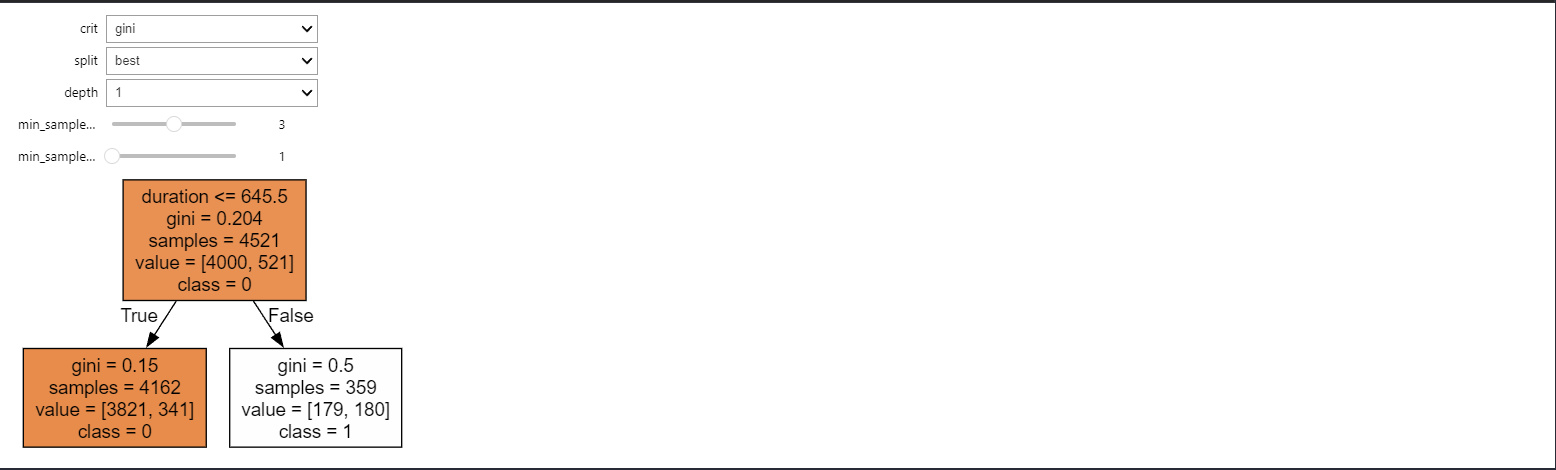           
